In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


# data source: https://juliasilge.com/blog/salary-gender/

def load_data():
    filename = '../big_datasets/stackoverflow/2019.csv'
    df = pd.read_csv(filename)
    return df 

main_df = load_data()
print(main_df.shape)
print(main_df.columns)
main_df.head(3)

(88883, 85)
Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult


In [2]:
def clean_data(df):
    """ 
    bin too many categoricals into fewer 
    select only interesting columns
    """
    selected_columns = [] # columns we want to return at the end
    
    # gender: man, woman, other
    df['gender'] = df['Gender'].astype(str).str.lower().apply(
        lambda s: s if s in ('man','woman') else 'other'
    )
    selected_columns.append('gender')
    
    # comp: converted to USD (NA if currency not below). Clipped within [$1, $1M].
#     conv_to_usd = {
#         'USD': 1,
#         'EUR': 1.104,
#         'INR': .01403,
#         'GBP': 1.312,
#         'CAD': .7618,
#         'AUD': .6845,
#         'BRL': .2398,
#         'PLN': .2602,
#         'RUB': .01615,
#         'SEK': .01049,
#         'CHF': 1.0310,
#         'ILS': .2893,
#         'TRY': .1685,
#         'CZK': .04391,
#         'PKR': .006468,
#     }
#     df['comp'] = df['CurrencySymbol'].apply(lambda x: conv_to_usd.get(x, np.nan)) * df['CompTotal']
#     df['comp'] = df['comp'].round().astype('Int64').clip(1, 10**6)
    df['comp'] = df['ConvertedComp'].round().astype('Int64')
    selected_columns.append('comp')

    # Employment: full-time, part-time, contractor, unemployed
    employments = {
        'Employed full-time': 'full-time',
        'Employed part-time': 'part-time',
        'Independent contractor, freelancer, or self-employed': 'contractor',
        'Not employed, and not looking for work': 'unemployed',
        'Not employed, but looking for work': 'unemployed',
        'Retired': 'unemployed',
    }
    df['employ'] = main_df['Employment'].apply(lambda x: employments.get(x, np.nan))
    selected_columns.append('employ')
    
    # age, clipped within [10,80]
    df['age'] = df['Age'].astype('float').round().astype('Int64').clip(10,80)
    selected_columns.append('age')
    
    # return columns we care about
    return df[selected_columns].copy()


df = clean_data(main_df)
df.sample(10)



,gender,comp,employ,age
33793,man,NaN,unemployed,23
16759,man,NaN,full-time,41
76128,man,25656,full-time,28
28306,man,17484,part-time,24
52167,man,NaN,unemployed,13
23222,other,133000,full-time,46
5830,man,NaN,full-time,32
69290,man,155000,full-time,49
36190,man,44892,full-time,33
1387,man,NaN,full-time,NaN


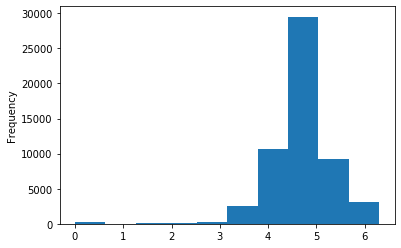

In [3]:
np.log10(df['comp']+1).plot.hist()


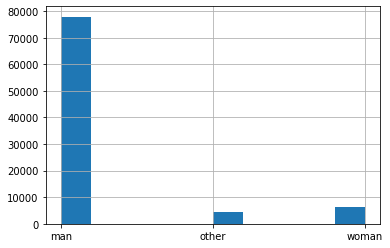

In [4]:
df['gender'].hist()